<a href="https://colab.research.google.com/github/CHANDMX20/ML/blob/main/ML_BERTopic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [ ]:
data = pd.read_csv("articles.csv")
data.head()

,PMID,ArticleTitle,PubDate,AuthorList,Abstract
0,12297610,Problem substance use among depressed patients...,2002.0,"Roeloffs, Carol A; Wells, Kenneth B; Ziedonis,...",This study identifies characteristics associat...
1,14652336,Racial and ethnic disparities in emergency dep...,2003.0,"Tamayo-Sarver, Joshua H; Hinze, Susan W; Cydul...",We examined racial and ethnic disparities in a...
2,16055770,Developments in the epidemiology of drug use a...,2005.0,"Compton, Wilson M; Thomas, Yonette F; Conway, ...",The past 30 years of research on the epidemiol...
3,16843611,"Motives, diversion and routes of administratio...",2007.0,"McCabe, Sean Esteban; Cranford, James A; Boyd,...",The main objectives of this study were to asse...
4,17169712,Opioid analgesics and rates of fatal drug pois...,2006.0,"Paulozzi, Leonard J; Ryan, George W",To determine whether the variability in rate o...


In [ ]:
#convert to lowercase
data['Abstract'] = data['Abstract'].str.lower()

# Specify the column and words to remove
column_to_clean = 'Abstract'
words_to_remove = ['prescription', 'opioids', 'use', 'opioid', 'patient', 'patients', 'tongue', 'sticking', 'year', 'hydrocodone', 'oxycodone', 'morphine', 'hydromorphone', 'fentanyl', 'methadone', 'heroin', 'methamphetamine', 'marijuana', 'overdose', 'overdoses', 'drug', 'drugs', 'gabapentin']

# Function to remove words from a text
def remove_words(text):
    for word in words_to_remove:
        text = text.replace(word, '')
    return text

# Apply the function to the specified column
data[column_to_clean] = data[column_to_clean].apply(remove_words)


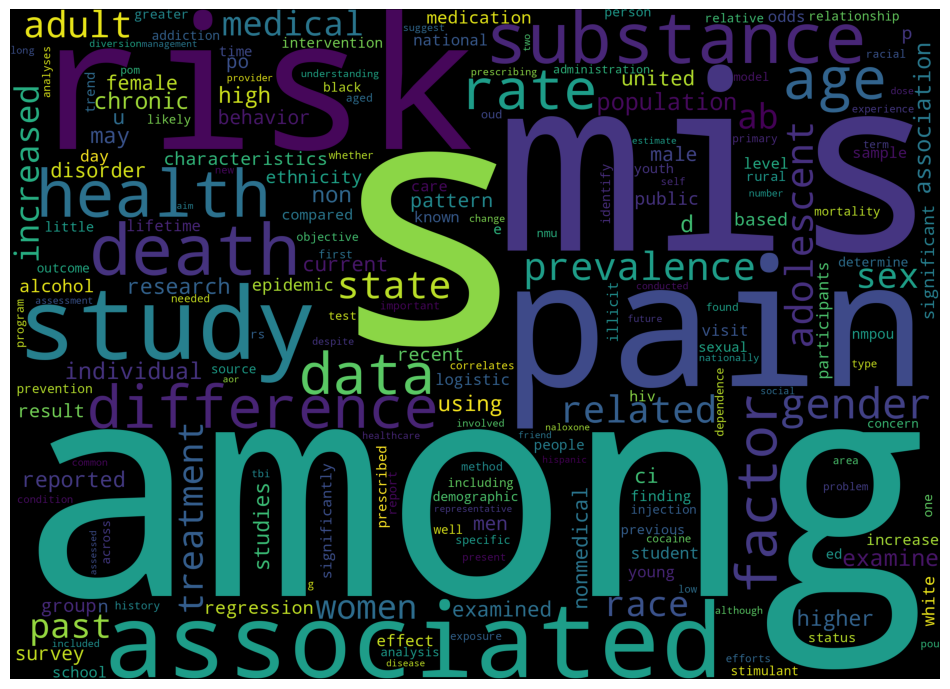

In [ ]:
output = pd.DataFrame(data, columns=['Abstract'])
plt.figure(figsize=(12,12))
#text = description_category.description.values
cloud = WordCloud(stopwords=STOPWORDS, background_color='black', collocations=False, width=2500, height=1800).generate(" ".join(output['Abstract']))
plt.axis('off')
plt.imshow(cloud)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#!pip install bertopic


In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer

from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [ ]:
# Step 1 - Extract embeddings
embedding_model = Word2Vec

# Step 2 - Reduce dimensionality
#umap_model = UMAP(n_neighbors=10, n_components=5, min_dist=0.0, metric='cosine')
dim_model = PCA(n_components=5)

# Step 3 - Cluster reduced embeddings
#hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
cluster_model = KMeans(n_clusters=50)


# Step 4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")

# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

# Step 6 - (Optional) Fine-tune topic representations with
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

In [ ]:
# All steps together
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=dim_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=cluster_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model # Step 6 - (Optional) Fine-tune topic represenations
)

In [ ]:
abstract_topics, _ = topic_model.fit_transform(data.Abstract)

In [ ]:
freq = topic_model.get_topic_info()
print("Number of topics: {}".format(len(freq)))
freq.head()

Number of topics: 50


,Topic,Count,Name,Representation,Representative_Docs
0,0,10,0_analgesic_pain_mortality_ambulatory,"[analgesic, pain, mortality, ambulatory, narco...","[in the past decade, there has been a rising t..."
1,1,10,1_alcohol_behaviors_prescribed_youth,"[alcohol, behaviors, prescribed, youth, parent...",[despite the fact that important gender differ...
2,2,9,2_epidemiologic_recession_pregnancies_health,"[epidemiologic, recession, pregnancies, health...",[ mis is a major public health concern in the...
3,3,9,3_pharmacokinetics_prescribed_medication_tablets,"[pharmacokinetics, prescribed, medication, tab...",[this retrospective study examined factors ass...
4,4,8,4_adolescents_adolescent_interventions_efficacy,"[adolescents, adolescent, interventions, effic...","[adolescent mis, addiction, and have emerged..."


In [ ]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
topic_model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('alcohol', 0.3164608),
 ('behaviors', 0.29633218),
 ('prescribed', 0.28487837),
 ('youth', 0.28439295),
 ('parental', 0.28294766),
 ('gender', 0.27933303),
 ('drinking', 0.27370343),
 ('effects', 0.26428673),
 ('sex', 0.25549534),
 ('social', 0.25135666)]

In [ ]:
topic_model.visualize_barchart(top_n_topics=50)


In [ ]:
topic_model.visualize_topics()


In [ ]:
topic_model.visualize_term_rank()

In [ ]:
topic_model.visualize_term_rank(log_scale=True)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=20)

In [ ]:
# Select most 3 similar topics
similar_topics, similarity = topic_model.find_topics("sex differences", top_n = 5)
similar_topics

[27, 1, 40, 4, 19]

In [ ]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(topic_model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[1]))

Most Similar Topic Info: 
[('gender', 0.5192014), ('transgender', 0.46229744), ('comorbidity', 0.4241286), ('disorders', 0.4136429), ('prevalence', 0.3751011), ('psychiatric', 0.35867333), ('female', 0.35173818), ('disability', 0.34012675), ('adolescent', 0.33001763), ('nonmedical', 0.32751852)]
Similarity Score: 0.4417039752006531


In [ ]:
topic_model.visualize_heatmap(n_clusters=10, top_n_topics=50)